In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import math

from sklearn.metrics import mean_squared_error

In [2]:
N = 1000
CNT = 100

In [3]:
def mean(samples, k):
    return sum(map(lambda x: np.power(x,k), samples)) / len(samples)

def uniform_sample(param):
    return np.random.uniform(low = 0, high = param, size=N)

def approx_uniform_param(samples, k):
    return np.power(mean(samples, k) * (k+1), 1 / k)

def exponential_sample(param):
    return np.random.exponential(scale = param, size=N)

def approx_exponential_param(samples, k):
    return (mean(samples, k) / np.math.factorial(k)) ** (1 / k)

def rmse_by_k(k, param, approx_param, sample):
    return mean_squared_error([approx_param(sample(param), k) for _ in range(CNT)], [param] * len(range(CNT)))

def experiment(max_k, param,  approx_param, sample):
    return [rmse_by_k(k, param, approx_param, sample) for k in range(1, max_k)]

def draw_uniform_results():
    uniform_results = experiment(max_k=150, param=1, approx_param=approx_uniform_param, sample=uniform_sample)
    
    fig, ax = plt.subplots()
    
    ax.plot([i for i in range(1, len(uniform_results) + 1)], uniform_results, label='uniform')
    
    ax.set_xlabel('K')
    ax.set_ylabel('RMSE')
    
    plt.legend()
    
def draw_exponential_results():
    exponential_results = experiment(max_k=150, param=3, approx_param=approx_exponential_param, sample=exponential_sample)
            
    fig, ax = plt.subplots()
    
    ax.plot([i for i in range(1, len(exponential_results) + 1)], exponential_results, label='exponential')
        
    ax.set_xlabel('K')
    ax.set_ylabel('RMSE')
    
    plt.legend()

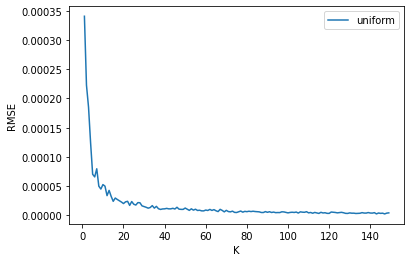

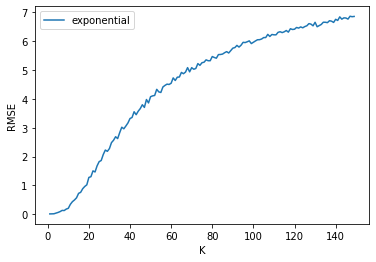

In [4]:
draw_uniform_results()
draw_exponential_results()